In [1]:
import numpy as np

In [2]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = 1 / (1 + np.exp(-float(np.matmul(theta, X[i]))))
    h = h.reshape(X.shape[0])
    return h

In [3]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(alpha/X.shape[0])*sum((h-y)
                               *X.transpose()[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i]=(-1/X.shape[0])*sum(y*np.log(h)+(1-y)*np.log(1 - h))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost

In [4]:
def logistic_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta,theta_history,cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, theta_history, cost

In [5]:
import pandas as pd
df = pd.read_table('marks.txt', delimiter = ',')
df.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
X = df[['X1','X2']]
y = df['y']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
x0 = np.ones((y_train[y_train == 0].shape[0], X_train.shape[1]))
x1 = np.ones((y_train[y_train == 1].shape[0], X_train.shape[1]))

In [9]:
x3 = X[y == 0]
x4 = X[y == 1]
X1 = [x3, x4]

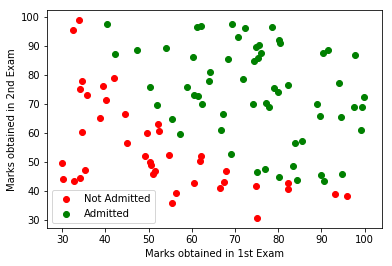

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x3['X1'], x3['X2'], c = 'r', label = 'Not Admitted')
plt.scatter(x4['X1'], x4['X2'], c = 'green', label = 'Admitted')
plt.xlabel("Marks obtained in 1st Exam")
plt.ylabel("Marks obtained in 2nd Exam")
plt.legend()
plt.show()

In [24]:
def add_one_column(X):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    return np.concatenate((one_column, X), axis = 1)

In [25]:
X_new = add_one_column(X_train)

In [26]:
n = X_train.shape[1]

In [27]:
res = logistic_regression(X_train, y_train, 0.001, 10000)

In [28]:
theta = res[0]

In [29]:
h = hypothesis(theta, X_new, n)
h

array([0.70217119, 0.69867111, 0.73436053, 0.68345271, 0.64048384,
       0.73210127, 0.75548343, 0.77752059, 0.75365295, 0.77582364,
       0.73477189, 0.72536794, 0.77908006, 0.5216281 , 0.66563686,
       0.51448147, 0.53851773, 0.76696403, 0.60100266, 0.73179035,
       0.66535791, 0.66083173, 0.72568109, 0.67829331, 0.58935119,
       0.77770665, 0.71244701, 0.57913617, 0.59119216, 0.64356322,
       0.73329721, 0.66540012, 0.61977082, 0.53035337, 0.73193595,
       0.74249892, 0.73119438, 0.62748578, 0.59540235, 0.70466148,
       0.70997021, 0.62491536, 0.75269338, 0.59517933, 0.62267409,
       0.69304027, 0.57716336, 0.7818797 , 0.78349088, 0.63912889,
       0.67458919, 0.65390204, 0.73195206, 0.7342811 , 0.63556674,
       0.67021921, 0.6902168 , 0.74744738, 0.72053486, 0.57359629,
       0.64875776, 0.7103628 , 0.74302339, 0.75360021, 0.52323301,
       0.73749233, 0.60489931, 0.75351613, 0.6389636 , 0.71278566,
       0.620317  , 0.5984642 , 0.60157655, 0.79629686, 0.59770

In [30]:
predicted_classes = (h >= 0.5).astype(int)
predicted_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
accuracy = np.mean(predicted_classes == y_train)
accuracy

0.6133333333333333

In [32]:
def predict(X, y, thr = 0.5):
    X_new = add_one_column(X)
    n = X.shape[1]
    predicted_classes = (hypothesis(theta, X_new, n) >= thr).astype(int)
    #predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == y)
    return accuracy * 100        

In [33]:
predict(X_train, y_train)

61.33333333333333

In [34]:
predict(X_test, y_test)

56.00000000000001

In [35]:
thr_range = np.arange(0, 1, 0.05)

In [36]:
for i in np.arange(0, 1, 0.05):
    print ("Training Set Accuracy for : " + str(i) + " is " +  str(predict(X_train, y_train, thr = i)))
    print ("Test Set Accuracy: " + str(i) + " is " +  str(predict(X_test, y_test, thr = i )))

Training Set Accuracy for : 0.0 is 61.33333333333333
Test Set Accuracy: 0.0 is 56.00000000000001
Training Set Accuracy for : 0.05 is 61.33333333333333
Test Set Accuracy: 0.05 is 56.00000000000001
Training Set Accuracy for : 0.1 is 61.33333333333333
Test Set Accuracy: 0.1 is 56.00000000000001
Training Set Accuracy for : 0.15000000000000002 is 61.33333333333333
Test Set Accuracy: 0.15000000000000002 is 56.00000000000001
Training Set Accuracy for : 0.2 is 61.33333333333333
Test Set Accuracy: 0.2 is 56.00000000000001
Training Set Accuracy for : 0.25 is 61.33333333333333
Test Set Accuracy: 0.25 is 56.00000000000001
Training Set Accuracy for : 0.30000000000000004 is 61.33333333333333
Test Set Accuracy: 0.30000000000000004 is 56.00000000000001
Training Set Accuracy for : 0.35000000000000003 is 61.33333333333333
Test Set Accuracy: 0.35000000000000003 is 56.00000000000001
Training Set Accuracy for : 0.4 is 61.33333333333333
Test Set Accuracy: 0.4 is 56.00000000000001
Training Set Accuracy for :

In [ ]:
#Vectorized implementation of Functions and use a optimization function to get the parameters

In [23]:
df.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [12]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

In [14]:
theta = np.zeros((X.shape[1], 1))

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def net_input(theta, x):
    #Computed the weighted sum of inputs
    return np.dot(x, theta)
def probability(theta, x):
    # Return the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [16]:
def cost_function(theta, x, y):
    #Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
    y*np.log(probability(theta, x)) + (1 - y) * np.log(
    1 - probability(theta, x)))
    return total_cost

In [17]:
def gradient(theta, x, y):
    m = x.shape[0]
    return (1/m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [19]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                          fprime=gradient, args=(x,y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)

In [37]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold = 0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(add_one_column(X_train), y_train)

90.66666666666666

In [38]:
accuracy(add_one_column(X_test), y_test)

84.0

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_train)
accuracy = accuracy_score(y_train,predicted_classes)
parameters = model.coef_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
parameters, accuracy

(array([[0.0330462 , 0.02631392]]), 0.8133333333333334)

In [44]:
predicted_classes_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,predicted_classes)

In [45]:
accuracy_test

0.88

In [48]:
model_fit = model.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
model_fit.score(X_test, y_test)

0.88

In [50]:
model_fit.score(X_train, y_train)

0.8133333333333334